In [218]:
import ternary
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import mpltern
import pickle
import os
from database_manager import DatabaseManager

In [219]:
os.getcwd()

'/Users/linarojas/Desktop/Research/Papers/Combinatorial_Ternary/Ellipsometry/Python/Python_scripts/Models'

In [220]:
import pickle
from pygam import LinearGAM, LogisticGAM, PoissonGAM  # use the model type you trained

with open("GAM_model/GAM_model.pkl", "rb") as f:
    gam = pickle.load(f)

#summary_text = gam.summary()

#with open("GAM_summary.txt", "w") as f:
    #f.write(summary_text)

## Ternnary plot

Ternary plot using EMA
1. Relaxation time calculation
2. E1 (1550)
3. E2 (1550)

In [221]:
df_merged = pd.read_pickle("GAM_model/GAM_model_data.pkl")
# Scaling the composition
df_merged[["Cu","Ni","Al"]] = df_merged[["Cu","Ni","Al"]]*100
#Filtering te optical properties
wave_1550 = df_merged[df_merged["wavelength_nm"] == 1552]

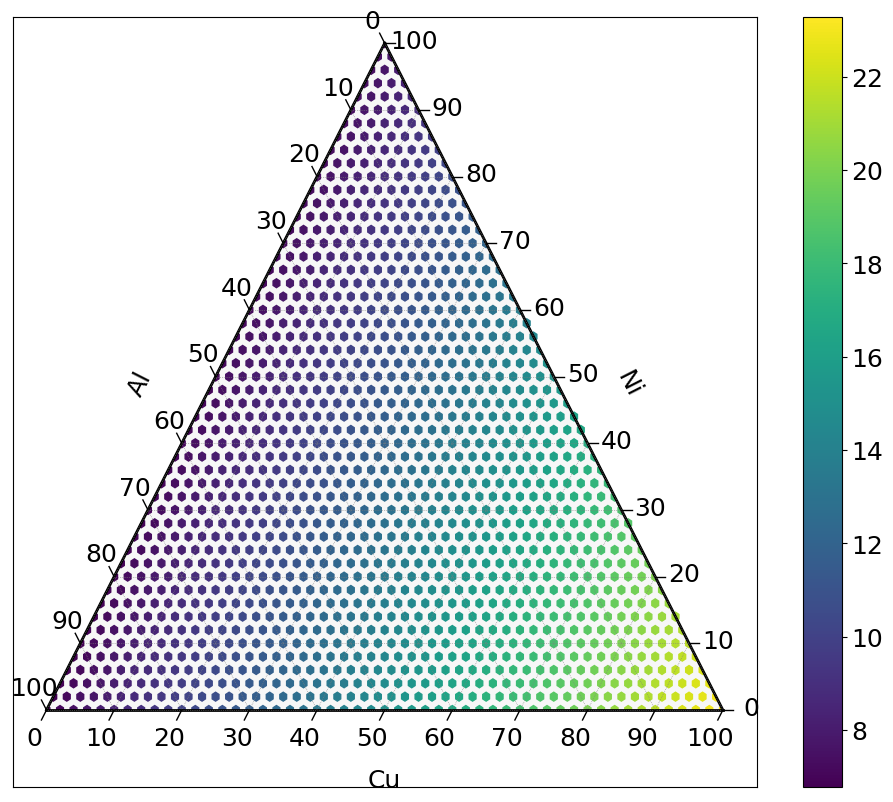

<Figure size 640x480 with 0 Axes>

In [222]:
data = df_merged.set_index(["Cu","Ni","Al"])["Relax_time"].to_dict()

scale = 100

fig, tax = ternary.figure(scale=scale)
fig.set_size_inches(12, 10)

# Plot heatmap
tax.heatmap(
    data,
    style="hexagonal",
    cmap="viridis",
    colorbar=True
)
cax = fig.axes[-1]
cax.tick_params(labelsize=18)


tax.boundary(linewidth=2.0)
tax.gridlines(color="gray", multiple=10)
#tax.set_title("EMA Relaxation time", fontsize=20)

tax.left_axis_label("Al",fontsize=18,offset =0.12)
tax.right_axis_label("Ni",fontsize=18,offset =0.12)
tax.bottom_axis_label("Cu",fontsize=18,offset =0.0)

tax.ticks(axis='lbr', multiple=10, offset =0.015,linewidth=1,fontsize=18)

tax.clear_matplotlib_ticks()

plt.show()

#fig.patch.set_visible(False)

plt.tight_layout()
#plt.savefig("ternary_heatmap.svg", format="svg")
plt.show()

Ternary plot using experimental data

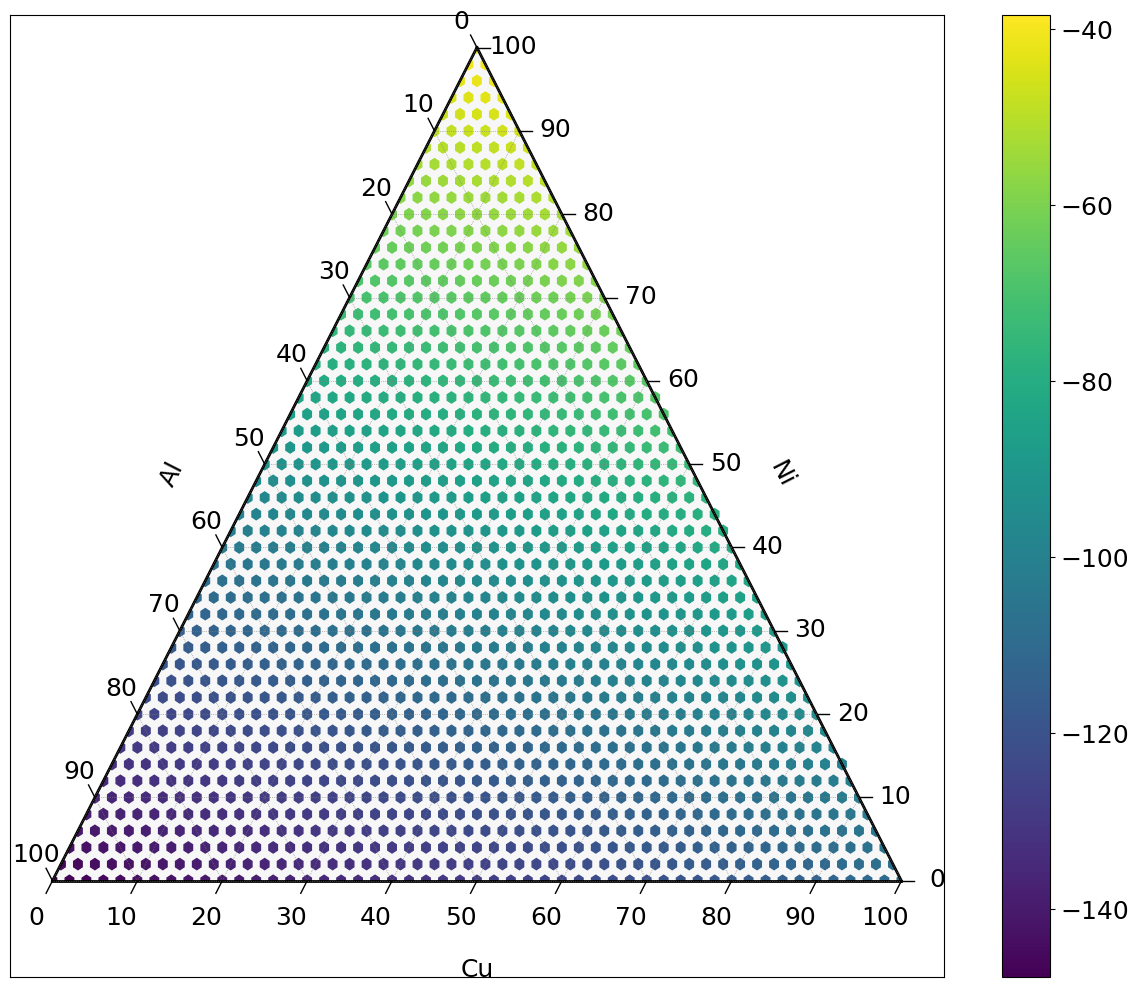

In [223]:
data = wave_1550.set_index(["Cu","Ni","Al"])["e1"].to_dict()
# Scale = sum of A+B+C
scale = 100

fig, tax = ternary.figure(scale=scale)
fig.set_size_inches(12, 10)

# Plot heatmap
tax.heatmap(
    data,
    style="hexagonal",
    cmap="viridis",
    colorbar=True
)
cax = fig.axes[-1]
cax.tick_params(labelsize=18)

tax.boundary(linewidth=2.0)
tax.gridlines(color="gray", multiple=10)
#tax.set_title("EMA Relaxation time", fontsize=20)

tax.left_axis_label("Al",fontsize=18,offset =0.12)
tax.right_axis_label("Ni",fontsize=18,offset =0.12)
tax.bottom_axis_label("Cu",fontsize=18,offset =0.0)

tax.ticks(axis='lbr', multiple=10, offset =0.015,linewidth=1,fontsize=18)

tax.clear_matplotlib_ticks()


#fig.patch.set_visible(False)

plt.tight_layout()
#plt.savefig("ternary_heatmap.svg", format="svg")
plt.show()

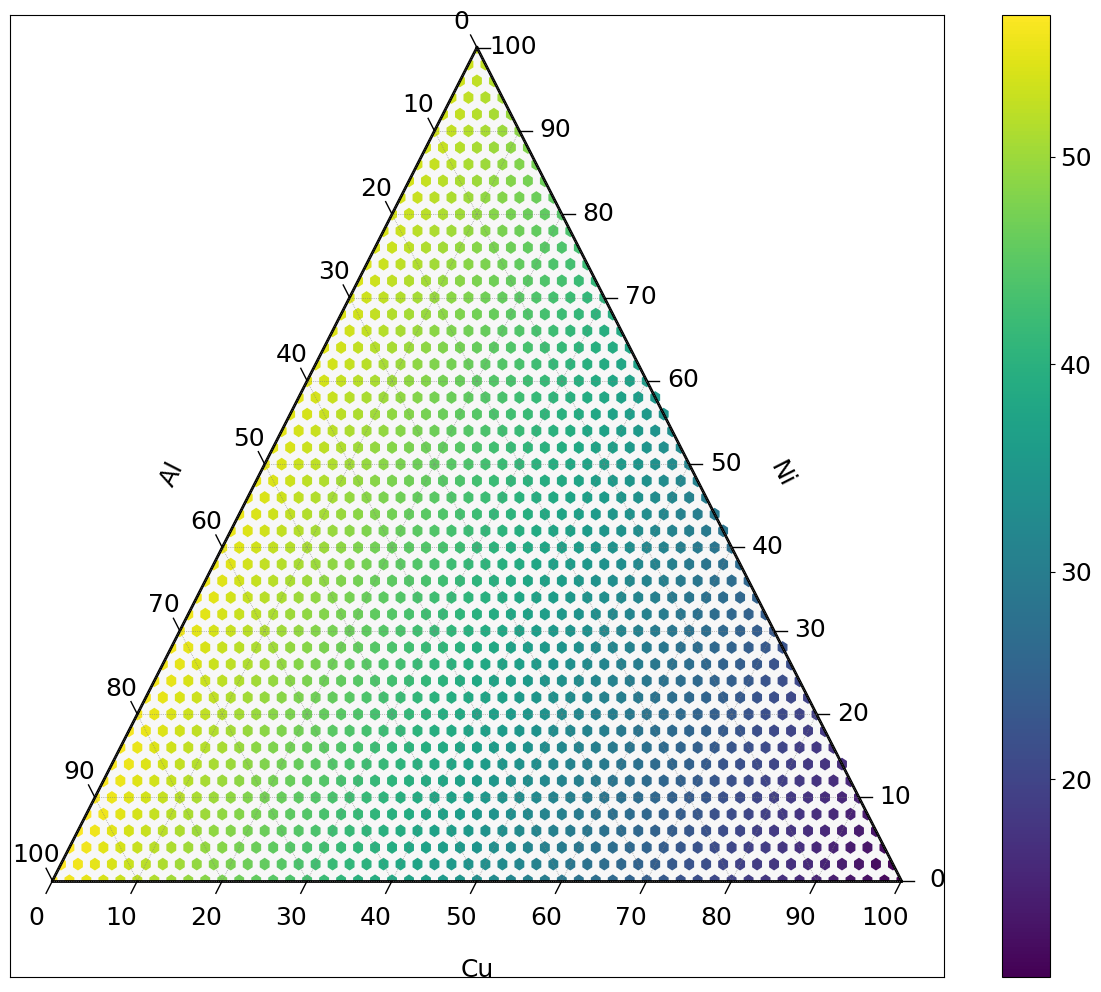

In [224]:
data = wave_1550.set_index(["Cu","Ni","Al"])["e2"].to_dict()
# Scale = sum of A+B+C
scale = 100

fig, tax = ternary.figure(scale=scale)
fig.set_size_inches(12, 10)

# Plot heatmap
tax.heatmap(
    data,
    style="hexagonal",
    cmap="viridis",
    colorbar=True
)
cax = fig.axes[-1]
cax.tick_params(labelsize=18)

tax.boundary(linewidth=2.0)
tax.gridlines(color="gray", multiple=10)
#tax.set_title("EMA Relaxation time", fontsize=20)

tax.left_axis_label("Al",fontsize=18,offset =0.12)
tax.right_axis_label("Ni",fontsize=18,offset =0.12)
tax.bottom_axis_label("Cu",fontsize=18,offset =0.0)

tax.ticks(axis='lbr', multiple=10, offset =0.015,linewidth=1,fontsize=18)

tax.clear_matplotlib_ticks()
#fig.patch.set_visible(False)

plt.tight_layout()
#plt.savefig("ternary_heatmap.svg", format="svg")
plt.show()

Ternary Experimental work
1. E1 (1550)
2. E2 (1550)

In [225]:
db = DatabaseManager("/Users/linarojas/Desktop/Research/Papers/Combinatorial_Ternary/Ellipsometry/Python/Python_scripts/Database/Ternary_round1.db")
tables = db.list_tables()
df_optical = db.table_dataframe('Optical_properties')
df_compositions = db.table_dataframe('compositions')
print (tables)
db.close()

df_tern_1_rou = pd.merge(df_optical,df_compositions, on='ID')
df_tern_1_rou[["Cu","Ni","Al"]] = df_tern_1_rou[["Cu","Ni","Al"]]*100
tern_1_1550 = df_tern_1_rou[df_tern_1_rou["wavelength_nm"] == 1552]

Connected to database: /Users/linarojas/Desktop/Research/Papers/Combinatorial_Ternary/Ellipsometry/Python/Python_scripts/Database/Ternary_round1.db
['compositions', 'Thickness', 'Optical_properties']
Database connection closed


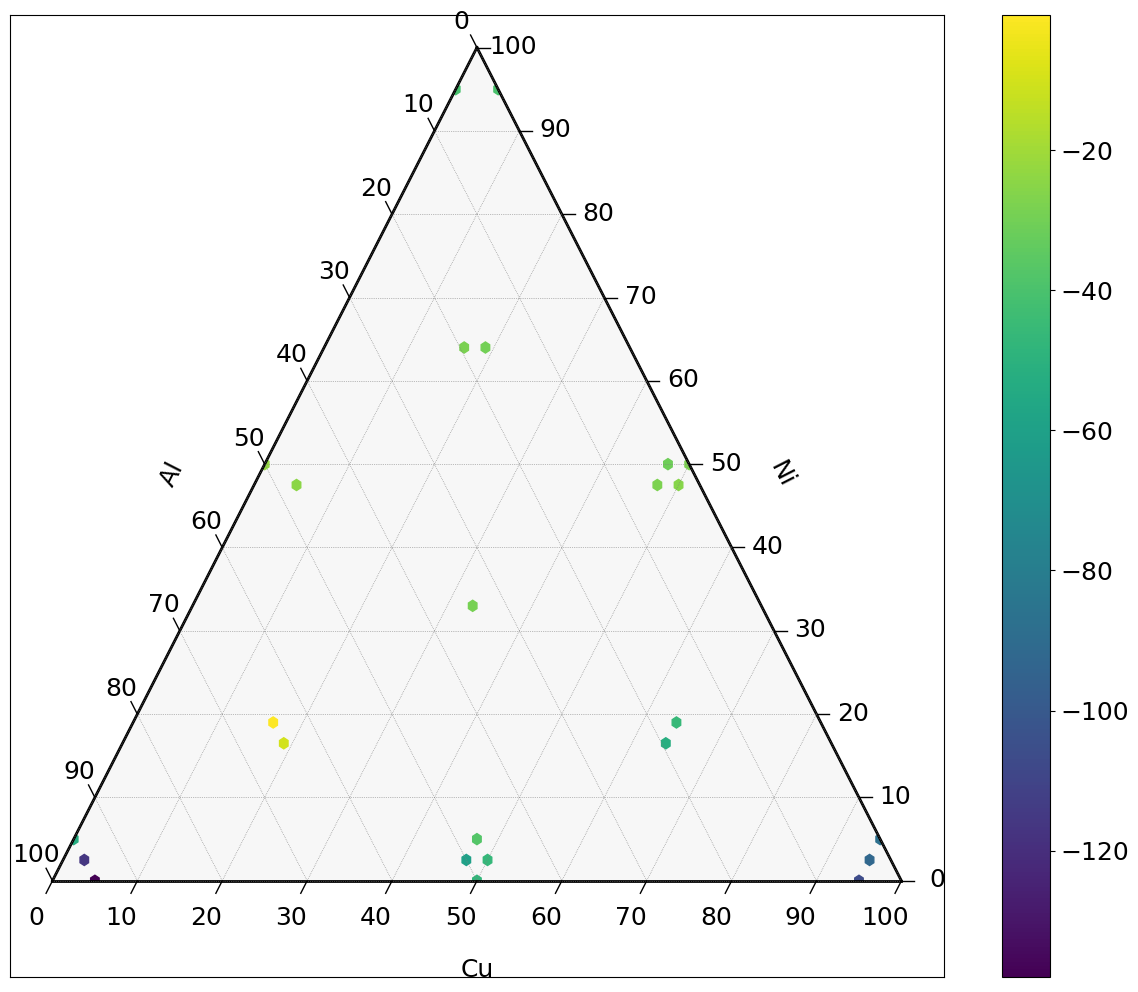

In [226]:
data = tern_1_1550.set_index(["Cu","Ni","Al"])["e1"].to_dict()
# Scale = sum of A+B+C
scale = 100

fig, tax = ternary.figure(scale=scale)
fig.set_size_inches(12, 10)

# Plot heatmap
tax.heatmap(
    data,
    style="hexagonal",
    cmap="viridis",
    colorbar=True
)
cax = fig.axes[-1]
cax.tick_params(labelsize=18)

tax.boundary(linewidth=2.0)
tax.gridlines(color="gray", multiple=10)
#tax.set_title("EMA Relaxation time", fontsize=20)

tax.left_axis_label("Al",fontsize=18,offset =0.12)
tax.right_axis_label("Ni",fontsize=18,offset =0.12)
tax.bottom_axis_label("Cu",fontsize=18,offset =0.0)

tax.ticks(axis='lbr', multiple=10, offset =0.015,linewidth=1,fontsize=18)

tax.clear_matplotlib_ticks()
#fig.patch.set_visible(False)

plt.tight_layout()
#plt.savefig("ternary_heatmap.svg", format="svg")
plt.show()

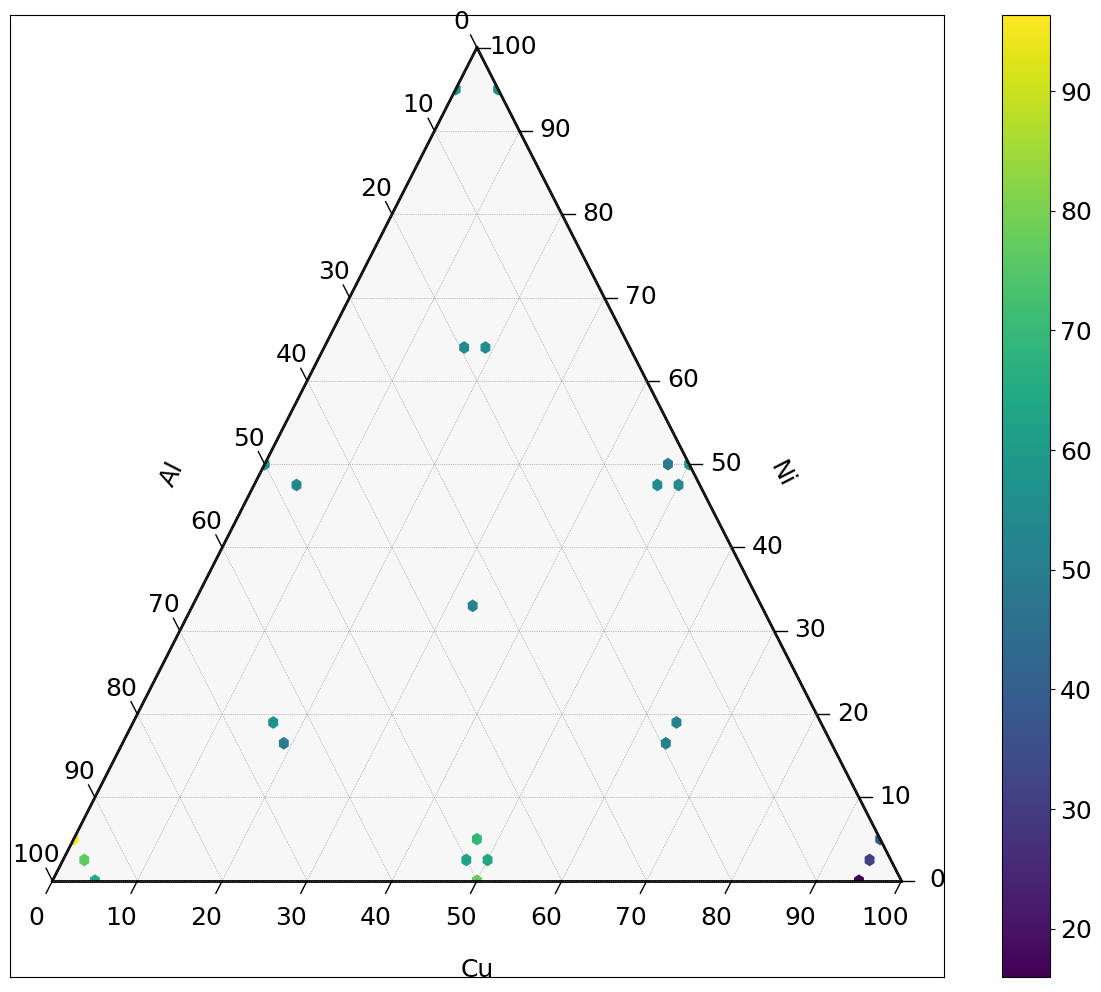

In [227]:
data = tern_1_1550.set_index(["Cu","Ni","Al"])["e2"].to_dict()
# Scale = sum of A+B+C
scale = 100

fig, tax = ternary.figure(scale=scale)
fig.set_size_inches(12, 10)

# Plot heatmap
tax.heatmap(
    data,
    style="hexagonal",
    cmap="viridis",
    colorbar=True
)
cax = fig.axes[-1]
cax.tick_params(labelsize=18)

tax.boundary(linewidth=2.0)
tax.gridlines(color="gray", multiple=10)
#tax.set_title("EMA Relaxation time", fontsize=20)

tax.left_axis_label("Al",fontsize=18,offset =0.12)
tax.right_axis_label("Ni",fontsize=18,offset =0.12)
tax.bottom_axis_label("Cu",fontsize=18,offset =0.0)

tax.ticks(axis='lbr', multiple=10, offset =0.015,linewidth=1,fontsize=18)

tax.clear_matplotlib_ticks()
#fig.patch.set_visible(False)

plt.tight_layout()
#plt.savefig("ternary_heatmap.svg", format="svg")
plt.show()

In [228]:
from database_manager import DatabaseManager
import pandas as pd
import numpy as np
import sqlite3

db = DatabaseManager("/Users/linarojas/Desktop/Research/Papers/Combinatorial_Ternary/Ellipsometry/Python/Python_scripts/Database/Pure_elements.db")
df_compositions = db.table_dataframe("compositions")
db.close()

Connected to database: /Users/linarojas/Desktop/Research/Papers/Combinatorial_Ternary/Ellipsometry/Python/Python_scripts/Database/Pure_elements.db
Database connection closed


In [229]:
from database_manager import DatabaseManager
import pandas as pd
import numpy as np
import sqlite3
from Create_EMA_properties import EMA_Properties

db = DatabaseManager("/Users/linarojas/Desktop/Research/Papers/Combinatorial_Ternary/Ellipsometry/Python/Python_scripts/Database/Ternary_round1.db")
df_compositions = db.table_dataframe('compositions')
db.close()

ema = EMA_Properties()

df = ema.EMA_dataframe(df_compositions,action='return')
ema.close()

Connected to database: /Users/linarojas/Desktop/Research/Papers/Combinatorial_Ternary/Ellipsometry/Python/Python_scripts/Database/Ternary_round1.db
Database connection closed
Connected to database: /Users/linarojas/Desktop/Research/Papers/Combinatorial_Ternary/Ellipsometry/Python/Python_scripts/Database/Pure_elements.db


AttributeError: 'EMA_Properties' object has no attribute 'close'

In [ ]:
df_1550 = df.copy()
df_1550 = df_1550[df_1550["wavelength_nm"] == 1552]
df_1550[["Cu","Ni","Al"]] = df_1550[["Cu","Ni","Al"]]*100

In [ ]:
data_exp = tern_1_1550.set_index(["Cu","Ni","Al"])["e1"].to_dict()

In [ ]:
df = df_1550.merge(tern_1_1550, on="ID", suffixes=("_df1", "_df2"))

df["abs_error"] = (df["e1_df1"] - df["e1_df2"]).abs()
df["rel_error"] = (df["abs_error"] / df["e1_df2"])
df["percent_error"] = df["rel_error"] * 100

In [ ]:
def error_calculation(df1, df2, variables):
    
    # Drop Cu, Ni, Al from df1 only if they exist there
    df1 = df1.drop(columns=['Cu', 'Ni', 'Al'], errors='ignore')
    
    # Merge
    df = df1.merge(df2, on="ID", suffixes=("_df1", "_df2"))

    # Compute error for each variable
    for variable in variables:
        df[f'error_{variable}'] = (
            df[f"{variable}_df1"] - df[f"{variable}_df2"]
        ).abs() / df[f"{variable}_df2"].abs()

    return df

In [ ]:
variables =['e1','e2']
df_error = error_calculation(df_1550,tern_1_1550,variables)

In [ ]:
df_error.head(5)

,ID,wavelength_nm_df1,e1_df1,e2_df1,Relax_time,Resistivity,wavelength_nm_df2,e1_df2,e2_df2,Cu,Ni,Al,error_e1,error_e2
0,1,1552.0,-105.451181,12.607361,22.48675,0.000002,1552,-87.642311,37.692028,95.0,5.0,0.0,0.203199,0.665517
1,2,1552.0,-110.916420,12.790387,22.45485,0.000002,1552,-106.513695,15.960722,95.0,0.0,5.0,0.041335,0.198634
2,3,1552.0,-43.857497,53.359855,7.38310,0.000007,1552,-40.659237,56.649986,0.0,95.0,5.0,0.078660,0.058078
3,4,1552.0,-41.921675,51.041595,8.20825,0.000007,1552,-40.401604,56.370949,5.0,95.0,0.0,0.037624,0.094541
4,5,1552.0,-145.761215,54.519076,7.60215,0.000003,1552,-138.014877,64.696091,5.0,0.0,95.0,0.056127,0.157305


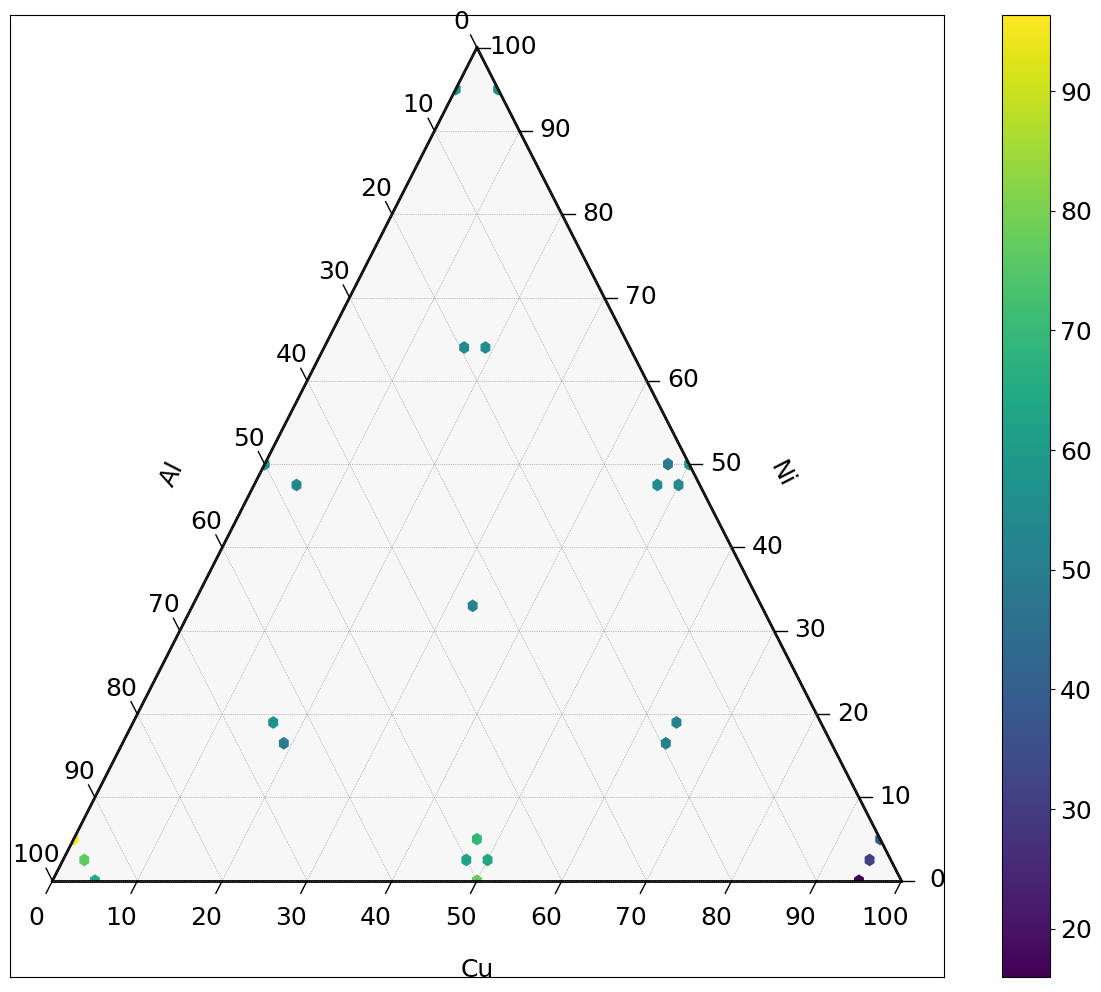

In [ ]:
data_exp = df_error.set_index(["Cu","Ni","Al"])["error_e1"].to_dict()
# Scale = sum of A+B+C
scale = 100

fig, tax = ternary.figure(scale=scale)
fig.set_size_inches(12, 10)

# Plot heatmap
tax.heatmap(
    data,
    style="hexagonal",
    cmap="viridis",
    colorbar=True
)
cax = fig.axes[-1]
cax.tick_params(labelsize=18)

tax.boundary(linewidth=2.0)
tax.gridlines(color="gray", multiple=10)
#tax.set_title("EMA Relaxation time", fontsize=20)

tax.left_axis_label("Al",fontsize=18,offset =0.12)
tax.right_axis_label("Ni",fontsize=18,offset =0.12)
tax.bottom_axis_label("Cu",fontsize=18,offset =0.0)

tax.ticks(axis='lbr', multiple=10, offset =0.015,linewidth=1,fontsize=18)

tax.clear_matplotlib_ticks()
#fig.patch.set_visible(False)

plt.tight_layout()
#plt.savefig("ternary_heatmap.svg", format="svg")
plt.show()

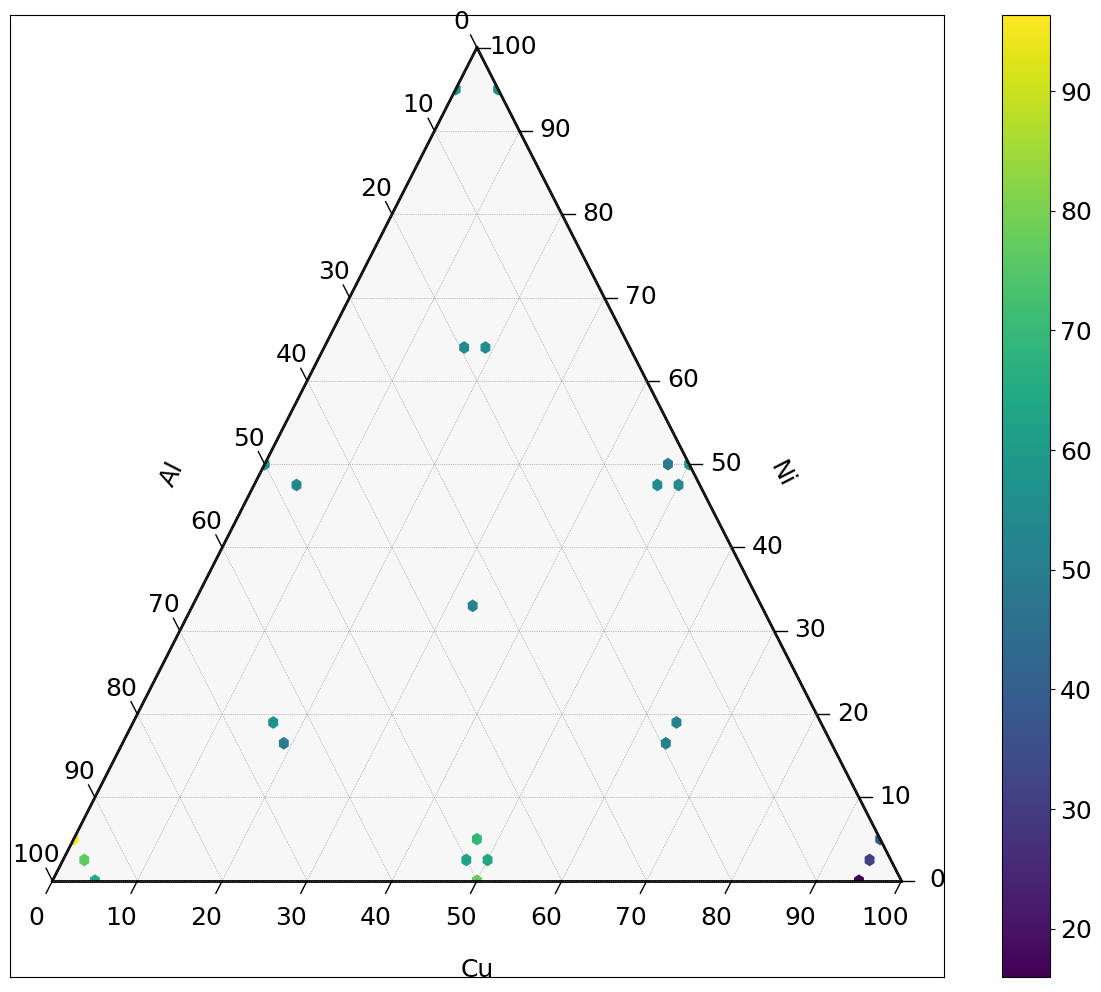

In [ ]:
data_exp = df_error.set_index(["Cu","Ni","Al"])["error_e2"].to_dict()
# Scale = sum of A+B+C
scale = 100

fig, tax = ternary.figure(scale=scale)
fig.set_size_inches(12, 10)

# Plot heatmap
tax.heatmap(
    data,
    style="hexagonal",
    cmap="viridis",
    colorbar=True
)
cax = fig.axes[-1]
cax.tick_params(labelsize=18)

tax.boundary(linewidth=2.0)
tax.gridlines(color="gray", multiple=10)
#tax.set_title("EMA Relaxation time", fontsize=20)

tax.left_axis_label("Al",fontsize=18,offset =0.12)
tax.right_axis_label("Ni",fontsize=18,offset =0.12)
tax.bottom_axis_label("Cu",fontsize=18,offset =0.0)

tax.ticks(axis='lbr', multiple=10, offset =0.015,linewidth=1,fontsize=18)

tax.clear_matplotlib_ticks()
#fig.patch.set_visible(False)

plt.tight_layout()
#plt.savefig("ternary_heatmap.svg", format="svg")
plt.show()

In [284]:
df_filt = df_tern_1_rou[(df_tern_1_rou["wavelength_nm"] >= 1550) & (df_tern_1_rou["wavelength_nm"] <= 2000)]

In [249]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# One row per sample / ID
comp_df = (
    df_filt
    .groupby("ID")[["Cu", "Ni", "Al"]]
    .first()
    .reset_index()
)

In [251]:
pca = PCA(n_components=1)
comp_df["PC1"] = pca.fit_transform(
    comp_df[["Cu", "Ni", "Al"]]
).flatten()

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("PCA components:\n", pca.components_)

Explained variance ratio: [0.54079518]
PCA components:
 [[-0.55962159 -0.23518594  0.79467682]]


In [252]:
df_pca = df_filt.merge(
    comp_df[["ID", "PC1"]],
    on="ID",
    how="left"
)

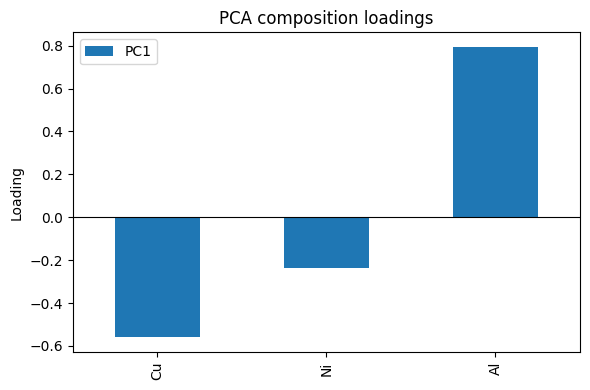

In [281]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=["Cu","Ni","Al"],
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

loadings.plot(kind="bar", figsize=(6,4))
plt.axhline(0, color="k", linewidth=0.8)
plt.ylabel("Loading")
plt.title("PCA composition loadings")
plt.tight_layout()
plt.show()

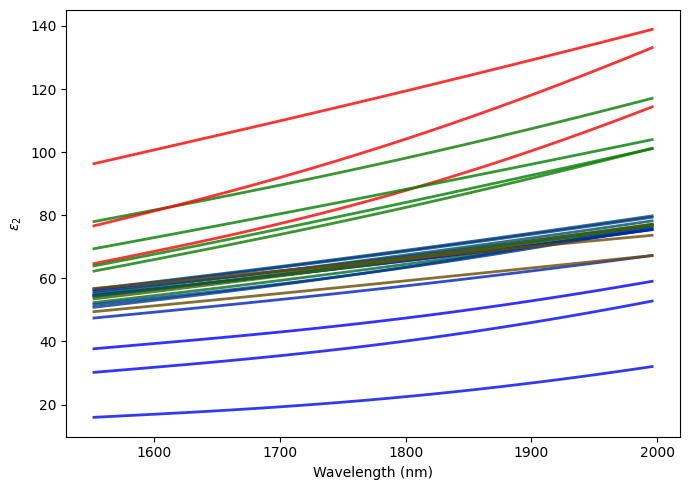

In [279]:
from matplotlib.colors import LinearSegmentedColormap

fig, ax = plt.subplots(figsize=(7,5))

rgb_cmap = LinearSegmentedColormap.from_list(
    "rgb_map",
    ["blue", "green", "red"]
)

norm = plt.Normalize(df_pca["PC1"].min(), df_pca["PC1"].max())
cmap = rgb_cmap

for id_val, sub in df_pca.groupby("ID"):
    sub = sub.sort_values("wavelength_nm")
    color = cmap(norm(sub["PC1"].iloc[0]))

    ax.plot(
        sub["wavelength_nm"],
        sub["e2"],
        color=color,
        alpha=0.8,
        linewidth=2
    )

sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])   # <- important for older matplotlib

#fig.colorbar(
    #sm,
    #ax=ax,
    #label="Composition PC1"
#)

ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel(r"$\varepsilon_2$")
fig.tight_layout()
plt.show()

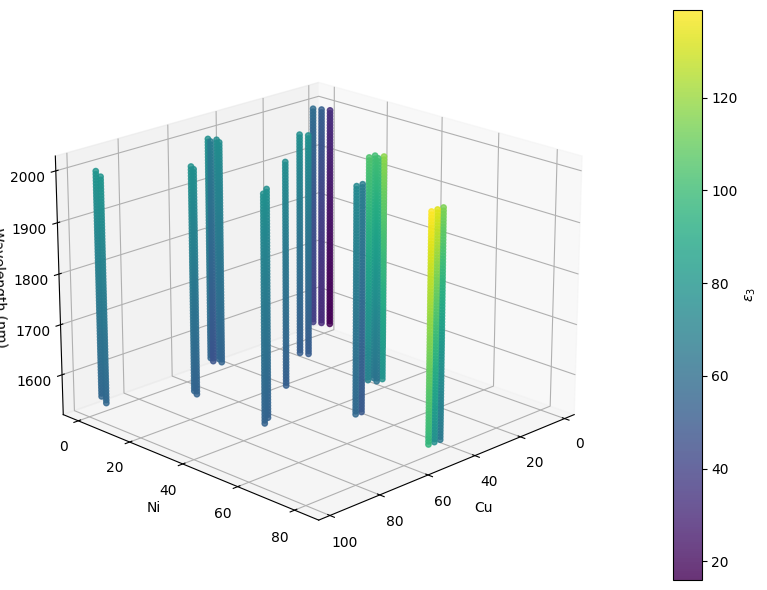

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def ternary_to_cartesian(cu, ni, al):
    """
    Assumes cu + ni + al = 1
    """
    x = ni + 0.5 * al
    y = (np.sqrt(3) / 2) * al
    return x, y


df1_ = df_filt.copy()

df1_["x"], df1_["y"] = ternary_to_cartesian(
    df_filt["Cu"].values,
    df_filt["Ni"].values,
    df_filt["Al"].values
)

df1_["z"] = df_filt["wavelength_nm"]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    df1_["x"],
    df1_["y"],
    df1_["z"],
    c=df1_["e2"],
    cmap="viridis",
    s=15,
    alpha=0.8
)

cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label(r"$\varepsilon_3$")

ax.set_xlabel("Cu")
ax.set_ylabel("Ni")
ax.set_zlabel("Wavelength (nm)")

ax.view_init(elev=20, azim=45)
plt.tight_layout()
plt.show()